In [40]:
import numpy as np
import pandas as pd
import os
import glob
from pyvis.network import Network

## PDN1

In [2]:
# Carga de un archivo json

direccion_fredin = '/content/drive/MyDrive/Septimo semestre/Datathon/'

path = 'MichPDN1'
all_files_1 = glob.glob(path + "/*.json")

##PDN2

In [3]:
# Carga de un archivo json
direccion_fredin = '/content/drive/MyDrive/Septimo semestre/Datathon/'

path = 'MichPDN2'
all_files = glob.glob(path + "/*.json")

df_2 = pd.DataFrame() # arreglo de dataframes de pdn1 Michiocan

for file in all_files:
  df = pd.read_json(file)
  df_2 = pd.concat([df_2, df])

display(df_2.shape)
display(df_2.head(3))

(301, 19)

,curp,ejercicioFiscal,fechaCaptura,finCargo,genero,id,inicioCargo,institucionDependencia,nivelResponsabilidad,nombres,observaciones,primerApellido,puesto,ramo,rfc,segundoApellido,superiorInmediato,tipoArea,tipoProcedimiento
0,CUAZ710202MMNRRL13,2022,2022-02-28T15:48:41Z,2022-02-28,"{'clave': 'F', 'valor': 'FEMENINO'}",DED6DUS9,2022-02-28,"{'clave': '052', 'nombre': 'Lázaro Cárdenas', ...","[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...",ZULMA,,DE LA CRUZ,"{'nivel': 'OPERATIVO', 'nombre': 'ASISTENTE'}","{'clave': 6, 'valor': 'ECONOMIA'}",CUAZ710202T50,ARMENTA,"{'curp': 'SAMM740702MMNNNN07', 'nombres': 'MON...","[{'clave': 'T', 'valor': 'TÉCNICA'}]","[{'clave': 2, 'valor': 'CONCESIONES, LICENCIAS..."
1,AACJ981115MGTBRC04,2022,2022-03-14T13:31:28Z,,"{'clave': 'F', 'valor': 'FEMENINO'}",WOH8KES1,2021-09-01,"{'clave': '113', 'nombre': 'José Sixto Verduzc...","[{'clave': 'R', 'valor': 'RESOLUCIÓN'}]",JACQUELINE,,ABRAHAM,"{'nivel': 'CONFIANZA', 'nombre': 'OFICIAL MAYOR'}","{'clave': 5, 'valor': 'INFRA-ESTRUCTURA'}",AACJ981115NV3,CRUZ,"{'curp': 'ROAR610227HMNBGB09', 'nombres': 'RUB...","[{'clave': 'RE', 'valor': 'RESPONSABLE DE LA E...","[{'clave': 1, 'valor': 'CONTRATACIONES PÚBLICA..."
2,TOAA990921MMNLGR03,2022,2022-03-01T12:14:07Z,2022-02-28,"{'clave': 'F', 'valor': 'FEMENINO'}",FID3SOK4,2022-02-28,"{'clave': '052', 'nombre': 'Lázaro Cárdenas', ...","[{'clave': 'A', 'valor': 'ATENCIÓN'}, {'clave'...",ARANZA,EXPIDEN LICENCIA DE NEGOCIOS,TOLEDO,"{'nivel': 'OPERATIVO', 'nombre': 'INSPECTOR'}","{'clave': 6, 'valor': 'ECONOMIA'}",TOAA990921DG7,AGUILAR,"{'curp': 'SAMM740702MMNNNN07', 'nombres': 'MON...","[{'clave': 'T', 'valor': 'TÉCNICA'}]","[{'clave': 2, 'valor': 'CONCESIONES, LICENCIAS..."


## Haciendo match de PDN1 con PDN2

In [4]:
def extraer_escuela(escolaridad):
  arreglo = []
  for i in range(len(escolaridad)):
    try :
      arreglo.append(escolaridad[i]['institucionEducativa']['nombre'])
    except:
      continue

  return arreglo

In [6]:
import json

def procesar_json(archivo):
  with open(archivo, 'r', encoding='utf-8') as f:
      data = json.load(f)

  registro = data[0]

  datos = {
  "id": registro.get("id", "Desconocido"),
  "actualizacion": registro.get("metadata", {}).get("actualizacion", "No especificado"),
  "institucion": registro.get("metadata", {}).get("institucion", "No especificado"),
  "tipo_declaracion": registro.get("metadata", {}).get("tipo", "No especificado"),
  "nombre": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosGenerales", {}).get("nombre", "No especificado"),
  "primerApellido": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosGenerales", {}).get("primerApellido", "No especificado"),
  "segundoApellido": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosGenerales", {}).get("segundoApellido", "No especificado"),
  "empleoCargoComision": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosEmpleoCargoComision", {}).get("empleoCargoComision", "No especificado"),
  "nivelEmpleoCargoComision": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosEmpleoCargoComision", {}).get("nivelEmpleoCargoComision", "No especificado"),
  "areaAdscripcion": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosEmpleoCargoComision", {}).get("areaAdscripcion", "No especificado"),
  "fechaTomaPosesion": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosEmpleoCargoComision", {}).get("fechaTomaPosesion", "No especificado"),
  "ingresoMensualNetoDeclarante": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("ingresos", {}).get("ingresoMensualNetoDeclarante", {}).get("valor", 0),
  "remuneracionMensualCargoPublico": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("ingresos", {}).get("remuneracionMensualCargoPublico", {}).get("valor", 0),
  "escolaridad": registro.get("declaracion", {}).get("situacionPatrimonial", {}).get("datosCurricularesDeclarante", {}).get("escolaridad", "No especificado"),
  }
  return datos

registros = [procesar_json(archivo) for archivo in all_files_1]
df_1 = pd.DataFrame(registros)

# cambiar nombre de columna nombre a nombres
df_1 = df_1.rename(columns={'nombre': 'nombres'})

display(df_1.shape)
display(df_1.head(3))

(1243, 14)

,id,actualizacion,institucion,tipo_declaracion,nombres,primerApellido,segundoApellido,empleoCargoComision,nivelEmpleoCargoComision,areaAdscripcion,fechaTomaPosesion,ingresoMensualNetoDeclarante,remuneracionMensualCargoPublico,escolaridad
0,lzays1qf81,2021-07-16T12:11:06Z,ACUITZIO DEL CANJE,INICIAL,RAUL,MUÑOZ,SOLIS,OFICIAL DE POLICIA,000,SEGURIDAD PUBLICA,2020-10-28,96614,96614,"[{'carreraAreaConocimiento': 'SIN CARRERA', 'd..."
1,cizp4r8fko,2021-10-11T15:40:23Z,ACUITZIO DEL CANJE,INICIAL,MARIA ELENA,AGUILAR,GUTIERREZ,SINDICA MUNICIPAL,000,SINDICATURA,2021-09-01,20294,20294,"[{'carreraAreaConocimiento': 'ADMINISTRACION',..."
2,9b5u87xzu7,2021-10-13T10:15:04Z,ACUITZIO DEL CANJE,INICIAL,JOSE ISMAEL,SALTO,FUERTE,REGIDOR,000,REGIDORES,2021-09-01,18597,18597,"[{'carreraAreaConocimiento': 'SIN CARRERA', 'd..."


In [7]:
# extrayendo los nombres de las escuelas de escolaridad
# display(df_1['escolaridad'][0][0])

df_1['escolaridad'] = df_1['escolaridad'].apply(extraer_escuela)

type(df_1['escolaridad'][0])

list

## Cargando PDNS3

In [8]:
path = 'PDN3'
all_files_3 = glob.glob(path + "/*.json")

def leer_pdns3(ruta_carpeta):
    data_trabajadores = []
    for archivo in os.listdir(ruta_carpeta):
        if archivo.endswith(".json"):

            with open(os.path.join(ruta_carpeta, archivo), encoding="utf-8") as f:
                trabajadores = json.load(f)


                for trabajador in trabajadores:
                    data_trabajadores.append({
                        "id": trabajador.get("id", "Desconocido"),
                        "autoridadSancionadora": trabajador.get("autoridadSancionadora", "No especificado"),
                        "causaMotivoHechos": trabajador.get("causaMotivoHechos", "No especificado"),
                        "expediente": trabajador.get("expediente", "No especificado"),
                        "fechaCaptura": trabajador.get("fechaCaptura", "No especificado"),
                        "fechaResolucion": trabajador.get("resolucion", {}).get("fechaResolucion", "No especificado"),
                        "curp": trabajador.get("servidorPublicoSancionado", {}).get("curp", "No especificado"),
                        "nombres": trabajador.get("servidorPublicoSancionado", {}).get("nombres", "No especificado"),
                        "primerApellido": trabajador.get("servidorPublicoSancionado", {}).get("primerApellido", "No especificado"),
                        "segundoApellido": trabajador.get("servidorPublicoSancionado", {}).get("segundoApellido", "No especificado"),
                        "puesto": trabajador.get("servidorPublicoSancionado", {}).get("puesto", "No especificado"),
                        "nivel": trabajador.get("servidorPublicoSancionado", {}).get("nivel", "No especificado"),
                        "genero": trabajador.get("servidorPublicoSancionado", {}).get("genero", {}).get("valor", "No especificado"),
                        "tipoFalta": trabajador.get("tipoFalta", {}).get("valor", "No especificado"),
                        "tipoSancion": ", ".join([s.get("valor", "Desconocido") for s in trabajador.get("tipoSancion", [])]),
                        "institucion": trabajador.get("institucionDependencia", {}).get("nombre", "No especificado"),
                        "multa_monto": trabajador.get("multa", {}).get("monto", 0),
                        "multa_moneda": trabajador.get("multa", {}).get("moneda", {}).get("valor", "No especificado"),
                        "inhabilitacion_plazo": trabajador.get("inhabilitacion", {}).get("plazo", "No especificado"),
                        "inhabilitacion_fechaInicial": trabajador.get("inhabilitacion", {}).get("fechaInicial", "No especificado"),
                        "inhabilitacion_fechaFinal": trabajador.get("inhabilitacion", {}).get("fechaFinal", "No especificado"),
                        "observaciones": trabajador.get("observaciones", "No especificado"),
                        "sancionado": 1
                    })
    return pd.DataFrame(data_trabajadores)

df_3 = leer_pdns3(path)

display(df_3.shape)
display(df_3.head(3))

(50, 23)

,id,autoridadSancionadora,causaMotivoHechos,expediente,fechaCaptura,fechaResolucion,curp,nombres,primerApellido,segundoApellido,...,tipoFalta,tipoSancion,institucion,multa_monto,multa_moneda,inhabilitacion_plazo,inhabilitacion_fechaInicial,inhabilitacion_fechaFinal,observaciones,sancionado
0,BAS2LUR1,SECRETARÍA DE CONTRALORÍA,SIN CONTAR CON AUTORIZACIÓN DE SU SUPERIOR JER...,DNR-PAR-17/2017,2023-06-20,2021-08-10,CARS860914MDFRYT09,STEFANY BERENICE,CARREON,REYES,...,VIOLACION LEYES Y NORMATIVIDAD PRESUPUESTAL,INHABILITADO,Secretaria de Finanzas y Administración,4697970.36,Pesos Mexicanos (MXN),5 AÑOS,2021-12-07,2026-12-07,NINGUNO,1
1,BOZ7JUV7,CONTRALORIA MUNICIPAL,OMISION EN LA PRESENTACION DE LA DECLARACION D...,HALC/CONT/JS/PRA/012/2020,2022-02-28,2021-07-08,JAFI900830HMNCLS05,ISAIAS,JACINTO,FLORES,...,INCUMPLIMIENTO EN DECLARACION DE SITUACION PAT...,INHABILITADO,Honorable Ayuntamiento de Lázaro Cárdenas,0.00,Pesos Mexicanos (MXN),01 UN AÑO,2021-07-15,2022-07-15,"SOLO SE APLICO INHABILITACION, NO MULTA",1
2,CAY5ZOB9,SECRETARÍA DE CONTRALORÍA,NO ADMINISTRO LOS RECURSOS FEDERALES PROVENIEN...,DNR-SRO-PAR-36/2018,2023-06-21,2022-01-07,CARS860914MDFRYT09,STEFANY BERENICE,CARREON,REYES,...,NEGLIGENCIA ADMINISTRATIVA,INHABILITADO,Secretaria de Finanzas y Administración,0.00,Pesos Mexicanos (MXN),4 AÑOS,2022-11-10,2026-11-10,NINGUNA,1


##Preprocesar los datos para hacer match

In [21]:
import unicodedata
import re

def eliminar_acentos(texto):
    try:
        texto_normalizado = unicodedata.normalize('NFD', texto)
        texto_sin_acento = ''.join(c for c in texto_normalizado if unicodedata.category(c) != 'Mn')
        return texto_sin_acento
    except:
        return texto

# Función para eliminar signos especiales
def quitar_signos_especiales(texto):
    if isinstance(texto, str):
        return re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]', '', texto)
    return texto

In [18]:
# preprocesar los nombres
df_1['nombres'] = df_1['nombres'].str.lower().str.strip()
df_1['primerApellido'] = df_1['primerApellido'].str.lower().str.strip()
df_1['segundoApellido'] = df_1['segundoApellido'].str.lower().str.strip()

df_2['nombres'] = df_2['nombres'].str.lower().str.strip()
df_2['primerApellido'] = df_2['primerApellido'].str.lower().str.strip()
df_2['segundoApellido'] = df_2['segundoApellido'].str.lower().str.strip()

df_3['nombres'] = df_3['nombres'].str.lower().str.strip()
df_3['primerApellido'] = df_3['primerApellido'].str.lower().str.strip()
df_3['segundoApellido'] = df_3['segundoApellido'].str.lower().str.strip()


# Aplicar funcion eliminar_acentos a cada reglon
df_1['nombres'] = df_1['nombres'].apply(eliminar_acentos)
df_1['primerApellido'] = df_1['primerApellido'].apply(eliminar_acentos)
df_1['segundoApellido'] = df_1['segundoApellido'].apply(eliminar_acentos)

df_2['nombres'] = df_2['nombres'].apply(eliminar_acentos)
df_2['primerApellido'] = df_2['primerApellido'].apply(eliminar_acentos)
df_2['segundoApellido'] = df_2['segundoApellido'].apply(eliminar_acentos)

df_3['nombres'] = df_3['nombres'].apply(eliminar_acentos)
df_3['primerApellido'] = df_3['primerApellido'].apply(eliminar_acentos)
df_3['segundoApellido'] = df_3['segundoApellido'].apply(eliminar_acentos)


# Quitar signos especiales
df_1['nombres'] = df_1['nombres'].apply(quitar_signos_especiales)
df_1['primerApellido'] = df_1['primerApellido'].apply(quitar_signos_especiales)
df_1['segundoApellido'] = df_1['segundoApellido'].apply(quitar_signos_especiales)

df_2['nombres'] = df_2['nombres'].apply(quitar_signos_especiales)
df_2['primerApellido'] = df_2['primerApellido'].apply(quitar_signos_especiales)
df_2['segundoApellido'] = df_2['segundoApellido'].apply(quitar_signos_especiales)

df_3['nombres'] = df_3['nombres'].apply(quitar_signos_especiales)
df_3['primerApellido'] = df_3['primerApellido'].apply(quitar_signos_especiales)
df_3['segundoApellido'] = df_3['segundoApellido'].apply(quitar_signos_especiales)


# Crear una nueva columna con el nombre completo
# df_1['nombreCompleto'] = df_1['nombres'].str.replace(' ', '') + df_1['primerApellido'].str.replace(' ', '') + df_1['segundoApellido']
# df_2['nombreCompleto'] = df_2['nombres'].str.replace(' ', '') + df_2['primerApellido'].str.replace(' ', '') + df_2['segundoApellido']

In [22]:
match_df = pd.merge(df_1, df_2, how='outer', on=['nombres','primerApellido','segundoApellido']) # solo hace junta 7 archivos


df_3['institucion'] = df_3['institucion'].str.lower().str.strip()
df_3['institucion'] = df_3['institucion'].apply(quitar_signos_especiales)
df_3['institucion'] = df_3['institucion'].apply(eliminar_acentos)

match_df['institucion'] = match_df['institucion'].str.lower().str.strip()
match_df['institucion'] = match_df['institucion'].apply(quitar_signos_especiales)
match_df['institucion'] = match_df['institucion'].astype(str).apply(eliminar_acentos)

match_df['empleoCargoComision'] = match_df['empleoCargoComision'].str.lower().str.strip()
match_df['empleoCargoComision'] = match_df['empleoCargoComision'].apply(quitar_signos_especiales)
match_df['empleoCargoComision'] = match_df['empleoCargoComision'].apply(eliminar_acentos)

# Cambiar el sancionado de NaN por 0

match_df = pd.merge(match_df,df_3, how='outer', on=['institucion','nombres','primerApellido','segundoApellido']) # parece que no hay coincidencias, posible explicacion es la contracción de nombres, si usamos solo apellidos hay una coincidencia de 2 funcionarios.
print(match_df.shape)
display(match_df.head(3))

(1587, 49)


,id_x,actualizacion,institucion,tipo_declaracion,nombres,primerApellido,segundoApellido,empleoCargoComision,nivelEmpleoCargoComision,areaAdscripcion,...,genero_y,tipoFalta,tipoSancion,multa_monto,multa_moneda,inhabilitacion_plazo,inhabilitacion_fechaInicial,inhabilitacion_fechaFinal,observaciones_y,sancionado
0,yyitzbkuxm,2021-10-25T10:08:57Z,acuitzio del canje,INICIAL,adileny,pineda,diaz,auxiliar,000,OFICIALIA MAYOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bclaxix1xh,2021-10-20T12:03:22Z,acuitzio del canje,INICIAL,alejandro,aguilar,mondragon,oficial mayor,000,OFICIALIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8f0wx813ay,2021-10-18T12:58:11Z,acuitzio del canje,INICIAL,alfredo valentin,santoyo,monrroy,auxiliar administrativo,000,DESARROLLO RURAL Y FORESTAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
def asignar_jerarquia(cargo):
    if isinstance(cargo, str):
        mapeo = {
            7: ['president', 'presidencia'],
            6: ['regidor', 'sindic'],
            5: ['secretario de', 'secretaria de', 'contralor', 'director', 'direccion', 
                'titular', 'encargad', 'oficial mayor'],
            4: ['coordinador', 'jefe', 'jefa', 'subdirector', 'subdireccion', 
                'subsecretar', 'autoridad sustanciadora', 'auditor'],
            3: ['abogado', 'asesor']
        }
        for jerarquia, palabras in mapeo.items():
            if any(cargo.startswith(palabra) for palabra in palabras):
                return jerarquia
    elif str(cargo) == 'nan':
        return 1
    return 2  # Valor predeterminado si no coincide ninguna categoría

In [32]:
match_df['jerarquia'] = match_df['empleoCargoComision'].apply(asignar_jerarquia)

Hasta el momento se puede ver que la cantidad de datos que tenemos es muy poca entre el match que conseguimos.

El PDN1 está constituido por Nombre del declarante

El PDN2 está constituido por Nombre del servidor público


Así mismo, la unión con PDN3 parece que no genera ninguna intersección con las demás bases que tenemos. Por ello mismo, solo parece que se concatena al momento de hacer un full outer.

Explicación del uso de full outer: este tipo de join es usado para poder encontrar las diferentes

## Creación del grafo

Vamos a crear el grafo usando networkX

Los nodos serán

1. Nodos de instituciones
2. Nodos de declarantes
3. Nodos de Universidades
4. Nodos de Empleos

La función del left join será para poder nutrir los datos del PDN1 con PDN2.

In [33]:
# Antes se debe de preprocesar las instituciones para no tener probleamas derivados por le formato
match_df['institucion'] = match_df['institucion'].str.lower().str.strip()
match_df['institucion'] = match_df['institucion'].apply(quitar_signos_especiales)
match_df['institucion'] = match_df['institucion'].apply(eliminar_acentos)

In [62]:
match_df[match_df['institucion'] == 'acuitzio del canje']

,id_x,actualizacion,institucion,tipo_declaracion,nombres,primerApellido,segundoApellido,empleoCargoComision,nivelEmpleoCargoComision,areaAdscripcion,...,tipoFalta,tipoSancion,multa_monto,multa_moneda,inhabilitacion_plazo,inhabilitacion_fechaInicial,inhabilitacion_fechaFinal,observaciones_y,sancionado,jerarquia
0,yyitzbkuxm,2021-10-25T10:08:57Z,acuitzio del canje,INICIAL,adileny,pineda,diaz,auxiliar,000,OFICIALIA MAYOR,...,9,9,9.0,9,9,9,9,9,9.0,2
1,bclaxix1xh,2021-10-20T12:03:22Z,acuitzio del canje,INICIAL,alejandro,aguilar,mondragon,oficial mayor,000,OFICIALIA,...,9,9,9.0,9,9,9,9,9,9.0,5
2,8f0wx813ay,2021-10-18T12:58:11Z,acuitzio del canje,INICIAL,alfredo valentin,santoyo,monrroy,auxiliar administrativo,000,DESARROLLO RURAL Y FORESTAL,...,9,9,9.0,9,9,9,9,9,9.0,2
3,l5a06jqald,2022-02-01T13:07:54Z,acuitzio del canje,INICIAL,brenda berenice,dominguez,soto,auxiliar,00000,COMUNICACION SOCIAL,...,9,9,9.0,9,9,9,9,9,9.0,2
4,h8ii76600e,2021-10-19T15:32:53Z,acuitzio del canje,INICIAL,carlos,herrera,lemus,auxiliar,000,UBR,...,9,9,9.0,9,9,9,9,9,9.0,2
5,25pdr4ging,2022-01-18T09:57:04Z,acuitzio del canje,INICIAL,diego,martinez,martinez,policia preventivo,POLICIA PREVENTIVO.,SEGURIDAD PUBLICA MUNICIPAL.,...,9,9,9.0,9,9,9,9,9,9.0,2
6,6xrimmqfsy,2021-10-15T15:48:32Z,acuitzio del canje,INICIAL,genoveva,viveros,sereno,directora,000,DIRECCION DE IGUALDAD SUSTANTIVA Y DESARROLLO ...,...,9,9,9.0,9,9,9,9,9,9.0,5
7,5z5615i7yf,2022-05-17T15:50:15Z,acuitzio del canje,INICIAL,jesus ismael,granados,geoeva,operativo,OPERATIVO,SEGURIDAD PUBLICA,...,9,9,9.0,9,9,9,9,9,9.0,2
8,f3f68a9eli,2022-02-21T15:00:14Z,acuitzio del canje,INICIAL,jose antonio,rojas,ramirez,oficial de policia,00000,SEGURIDAD PUBLICA,...,9,9,9.0,9,9,9,9,9,9.0,2
9,q5i2ngi1pz,2022-01-14T13:32:54Z,acuitzio del canje,INICIAL,jose ignacio,alvarez,martinez,auxiliar,00000,AUXILIAR,...,9,9,9.0,9,9,9,9,9,9.0,2


In [42]:
declarantes = match_df[['nombres','primerApellido','segundoApellido', 'jerarquia', 'empleoCargoComision']].drop_duplicates()
instituciones = match_df[['institucion']].drop_duplicates()
escolaridad = match_df[['escolaridad']].drop_duplicates()

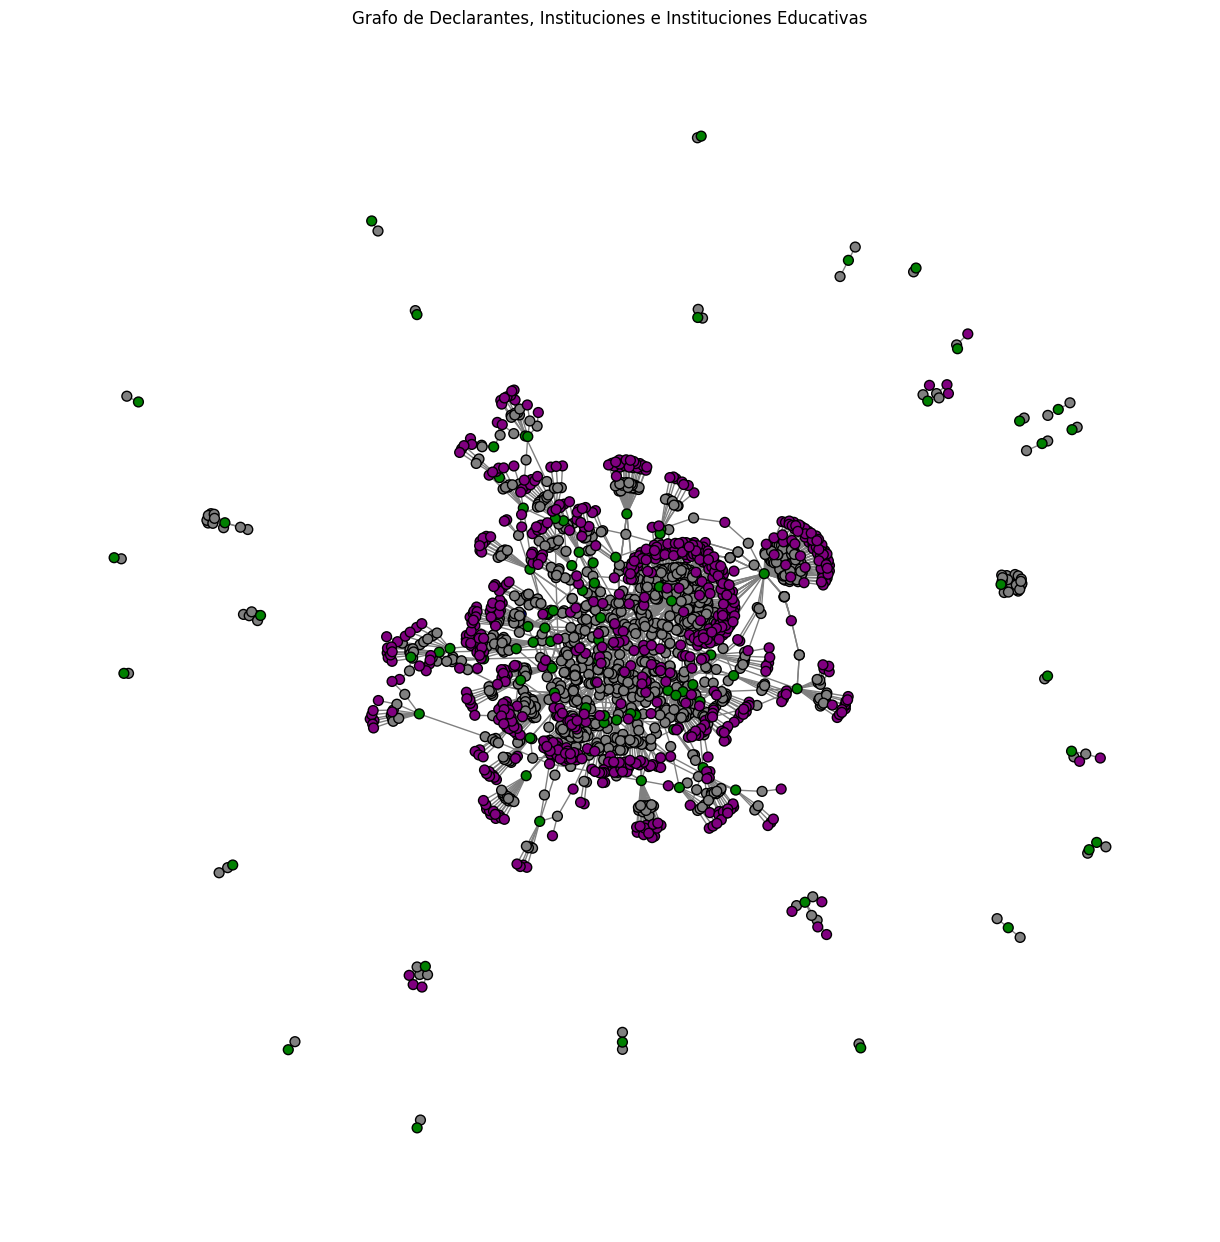

In [68]:

import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo
G = nx.Graph()

# Agregar nodos de declarantes
for _, row in declarantes.iterrows():
    G.add_node(f"{row['nombres']} {row['primerApellido']} {row['segundoApellido']}", type='declarante',
                jerarquia=row['jerarquia']) # Agregar el nodo con el nombre completo

# Agregar nodos de instituciones
for _, row in instituciones.iterrows():
  if row['institucion'] != 'nan':
    G.add_node(row['institucion'], type='institucion')

# Agregar nodos de escolaridad (instituciones educativas)
for _, row in escolaridad.iterrows():
    if isinstance(row['escolaridad'], list):  # Verificar si es una lista
        for x in row['escolaridad']:
            G.add_node(x, type='escolaridad')

# Agregar conexiones entre declarantes e instituciones
for _, row in match_df.iterrows():
    declarante = f"{row['nombres']} {row['primerApellido']} {row['segundoApellido']}"
    institucion = row['institucion']
    if institucion != 'nan':
        G.add_edge(declarante, institucion)
    else:
        try:
            G.remove_node(declarante)
        except:
            continue

# Agregar conexiones entre declarantes e instituciones educativas
for _, row in match_df.iterrows():
    declarante = f"{row['nombres']} {row['primerApellido']} {row['segundoApellido']}"
    if isinstance(row['escolaridad'], list):
        if len(row['escolaridad']) > 0:
            if declarante not in G.nodes:
                G.add_node(declarante, type='declarante', jerarquia=row['jerarquia'])
        for escuela in row['escolaridad']:
            G.add_edge(declarante, escuela)  # Conectar el declarante con cada institución educativa

# Visualizar el grafo
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)

# Asignar colores según el tipo de nodo
node_colors = []
for _, data in G.nodes(data=True):
    if _ == 'adileny pineda diaz':
        node_colors.append('blue')
    elif data['type'] == 'declarante':
        node_colors.append('gray')  # Gris para declarantes
    elif data['type'] == 'institucion':
        node_colors.append('green')  # Verde claro para instituciones
    elif data['type'] == 'escolaridad':
        node_colors.append('purple')  # Morado claro para instituciones educativas
    else:
        node_colors.append('lightgray')  # Color predeterminado para tipos no definidos
        
# Asignar tamaño de nodos según la jerarquía
node_sizes = []
for node in G.nodes():
    if node == 'adileny pineda diaz':
        node_sizes.append(500)
    elif G.nodes[node]['type'] == 'declarante':
        node_sizes.append(100 + G.nodes[node]['jerarquia'] * 50)
    else:
        node_sizes.append(100)

# Dibujar el grafo
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=50, font_size=8, edge_color='gray', edgecolors='black')
plt.title("Grafo de Declarantes, Instituciones e Instituciones Educativas")
plt.show()

## Metricas de grafo

In [54]:
# Encontrar todas las componentes conexas
componentes = list(nx.connected_components(G))

# Identificar la componente más grande
componente_mas_grande = max(componentes, key=len)

# Crear un subgrafo de la componente más grande
subgrafo_mas_grande = G.subgraph(componente_mas_grande)

# Calcular la conectividad mínima de nodos en la componente más grande
edge_connectivity = nx.minimum_node_cut(subgrafo_mas_grande)

# Imprimir los resultados
print("Nodos de la componente más grande:", len(componente_mas_grande))
print("Conectividad mínima de nodos:", edge_connectivity)

Nodos de la componente más grande: 1993
Conectividad mínima de nodos: {'angelica ramirez tellez'}


In [ ]:
print("Cantidad de componentes conectadas",nx.number_connected_components(subgrafo_mas_grande))
print("Conectividad de nodos:",nx.node_connectivity(subgrafo_mas_grande))
print("edge_connectivity:", nx.edge_connectivity(subgrafo_mas_grande))
print("minimum_node_cut:", nx.minimum_node_cut(subgrafo_mas_grande))
print("degree_centrality:", sorted(nx.degree_centrality(subgrafo_mas_grande).items(), key=lambda x: x[1], reverse=True))
print("closeness_centrality:", sorted(nx.closeness_centrality(subgrafo_mas_grande).items(), key=lambda x: x[1], reverse=True))
print("betweenness_centrality:", sorted(nx.betweenness_centrality(subgrafo_mas_grande).items(), key=lambda x: x[1], reverse=True))
print("eigenvector_centrality:", sorted(nx.eigenvector_centrality(subgrafo_mas_grande).items(), key=lambda x: x[1], reverse=True))
print("pagerank:", sorted(nx.pagerank(subgrafo_mas_grande).items(), key=lambda x: x[1], reverse=True))

Cantidad de componentes conectadas 1
Conectividad de nodos: 1
edge_connectivity: 1
minimum_node_cut: {'angelica ramirez tellez'}
degree_centrality: [('municipio de uruapan michoacan', 0.142570281124498), ('municipio de sahuayo michoacan', 0.06977911646586345), ('municipio de tarimbaro michoacan', 0.03313253012048192), ('municipio de zacapu michoacan', 0.03162650602409638), ('INEA', 0.0286144578313253), ('ayuntamiento de tzitzio', 0.028112449799196783), ('UNIVERSIDAD MICHOACANA DE SAN NICOLAS DE HIDALGO', 0.01857429718875502), ('municipio de jungapeo michoacan', 0.017570281124497992), ('cuitzeo', 0.014558232931726907), ('UMSNH', 0.013554216867469878), ('tacambaro', 0.011546184738955823), ('acuitzio del canje', 0.010542168674698794), ('jiquilpan', 0.010542168674698794), ('chilchota', 0.010040160642570281), ('maravatio', 0.010040160642570281), ('CONALEP', 0.008032128514056224), ('penjamillo', 0.00753012048192771), ('ario', 0.007028112449799196), ('periban', 0.007028112449799196), ('la pie

In [26]:
print("diameter:", nx.diameter(subgrafo_mas_grande))
print("eccentricity:", nx.eccentricity(subgrafo_mas_grande))
print("density:", nx.density(subgrafo_mas_grande))
print("find_cliques:", nx.find_cliques(subgrafo_mas_grande))
print("clustering:", nx.clustering(subgrafo_mas_grande))
print("average_clustering:", nx.average_clustering(subgrafo_mas_grande))

diameter: 20
eccentricity: {'adileny pineda diaz': 15, 'alejandro aguilar mondragon': 13, 'alfredo valentin santoyo monrroy': 15, 'brenda berenice dominguez soto': 15, 'carlos herrera lemus': 13, 'diego martinez martinez': 13, 'genoveva viveros sereno': 13, 'jesus ismael granados geoeva': 13, 'jose antonio rojas ramirez': 15, 'jose ignacio alvarez martinez': 15, 'jose ismael salto fuerte': 15, 'juan luis tinoco pinon': 15, 'julio pinon rico': 15, 'laura alicia acuna govea': 13, 'lorena gomez montoya': 15, 'luis mario jacuinde olivos': 15, 'ma zenaida serrano mendoza': 13, 'maria elena aguilar gutierrez': 13, 'raul munoz solis': 15, 'ricardo pinon vargas': 15, 'uber aburto calderon': 15, 'antonio prado contreras': 15, 'carla yuritzia arias alvarez': 13, 'daisy alejandra valencia maldonado': 15, 'daniel solis medina': 13, 'guadalupe marisol bejinez guerrero': 13, 'jose luis aguilar prado': 15, 'juan manuel rafael alvarez': 15, 'ma guadalupe gonzalez olivares': 15, 'maria valeria vargas c

In [27]:
print("transitivity:", nx.transitivity(subgrafo_mas_grande))
print("adjacency_matrix:", nx.adjacency_matrix(subgrafo_mas_grande))
print("laplacian_spectrum:", nx.laplacian_spectrum(subgrafo_mas_grande))
print("adjacency_spectrum:", nx.adjacency_spectrum(subgrafo_mas_grande))

# Calculate and print greedy modularity communities
communities = nx.algorithms.community.greedy_modularity_communities(subgrafo_mas_grande)
print("(comunidades) greedy_modularity_communities:", communities)

# Calculate and print label propagation communities
label_prop_communities = nx.algorithms.community.label_propagation_communities(subgrafo_mas_grande)
print("(comunidades) label_propagation_communities:", label_prop_communities)

# Calculate and print modularity using greedy modularity communities
modularity_greedy = nx.algorithms.community.modularity(subgrafo_mas_grande, communities)
print("(comunidades) modularity (greedy):", modularity_greedy)

transitivity: 0
adjacency_matrix:   (0, 1165)	1
  (0, 1225)	1
  (1, 1165)	1
  (1, 1226)	1
  (2, 1165)	1
  (2, 1227)	1
  (3, 1165)	1
  (3, 1228)	1
  (4, 1165)	1
  (4, 1226)	1
  (5, 1165)	1
  (5, 1229)	1
  (6, 1165)	1
  (6, 1230)	1
  (7, 1165)	1
  (7, 1231)	1
  (8, 1165)	1
  (8, 1232)	1
  (9, 1165)	1
  (9, 1233)	1
  (10, 1165)	1
  (10, 1234)	1
  (11, 1165)	1
  (11, 1235)	1
  (12, 1165)	1
  :	:
  (1968, 1128)	1
  (1969, 1128)	1
  (1970, 1128)	1
  (1971, 1129)	1
  (1972, 1130)	1
  (1973, 1131)	1
  (1974, 1132)	1
  (1975, 1133)	1
  (1976, 1134)	1
  (1977, 1137)	1
  (1978, 1140)	1
  (1979, 1141)	1
  (1980, 1142)	1
  (1981, 1143)	1
  (1982, 1144)	1
  (1983, 1145)	1
  (1984, 1146)	1
  (1985, 1147)	1
  (1986, 1149)	1
  (1987, 1150)	1
  (1988, 1151)	1
  (1989, 1153)	1
  (1990, 1154)	1
  (1991, 1156)	1
  (1992, 1157)	1
laplacian_spectrum: [-7.22944717e-15  1.07067129e-02  1.16904890e-02 ...  6.70158112e+01
  1.40007372e+02  2.85003613e+02]
adjacency_spectrum: [-16.9218115 +0.j  16.9218115 +0.j -1

In [28]:
modularity_label_prop = nx.algorithms.community.modularity(subgrafo_mas_grande, label_prop_communities)
print("(comunidades) modularity (label propagation):", modularity_label_prop)

(comunidades) modularity (label propagation): 0.54559436934257


## Observando subgrafos

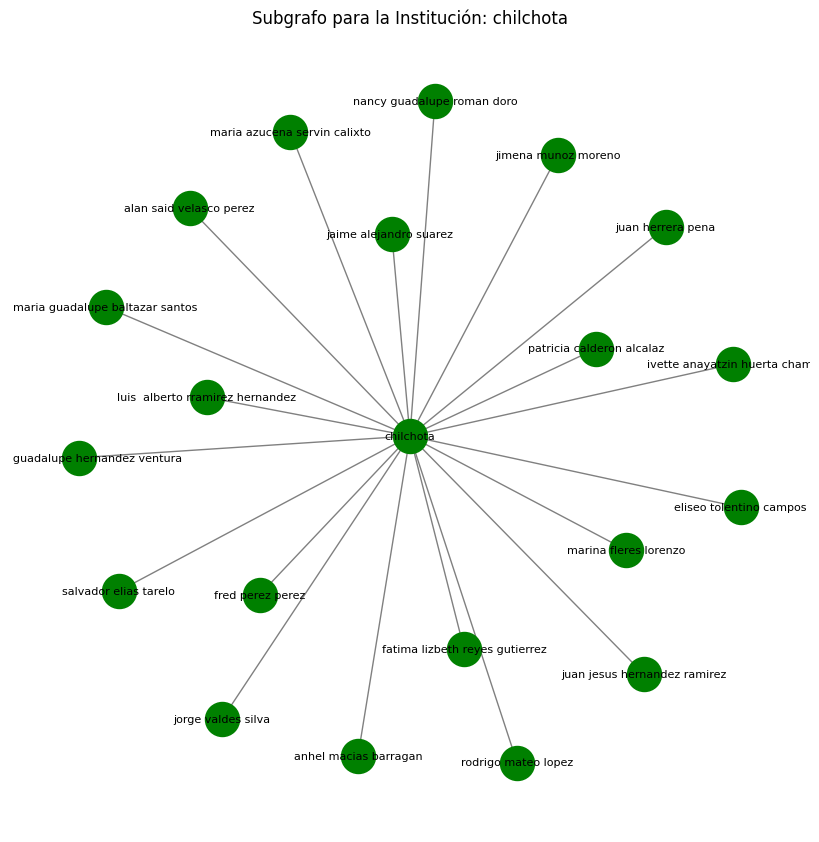

In [29]:
def subgrafo_por_institucion(G, institucion):
    # Obtener todos los nodos conectados a la institución
    nodos_relacionados = [institucion] + list(nx.neighbors(G, institucion))
    # Crear el subgrafo
    subgrafo = G.subgraph(nodos_relacionados)
    return subgrafo

# Ejemplo con una institución específica
institucion_especifica = "chilchota"  # Cambiar por el nombre deseado
subgrafo_inst = subgrafo_por_institucion(G, institucion_especifica)

# Visualizar el subgrafo
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(subgrafo_inst, seed=42)
nx.draw(subgrafo_inst, pos, with_labels=True, node_color='green', node_size=600, font_size=8, edge_color='gray')
plt.title(f"Subgrafo para la Institución: {institucion_especifica}")
plt.show()

### Creacion de embeddings

### Haremos uso de Node2Vec

In [38]:
pip install node2vec

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
Note: you may need to restart the kernel to use updated packages.


In [39]:
pip install torch torchvision torch-geometric

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/203.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/203.0 MB 2.6 MB/s eta 0:01:19
   ---------------------------------------- 1.3/203.0 MB 2.5 MB/s eta 0:01:22
   ---------------------------------------- 2.1/203.0 MB 2.6 MB/s eta 0:01:18
    --------------------------------------- 2.6/203.0 MB 2.6 MB/s eta 0:01:18
    --------------------------------------- 3.1/203.0 MB 2.6 MB/s eta 0:01:16
    --------------------------------------- 3.7/203.0 MB 2.6 MB/s eta 0:01:18
    --------------------------------------- 4.5/203.0 MB 2.8 MB/s eta 0:01:12
   - -------------------------------------- 5.5/203.0 MB 3.0 MB/s eta 0:01:05
   - -------------------------------------- 6.8/203.0 MB 3.4 MB/s eta 0:00:59
   - --

In [40]:
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# node_embedding = model.wv['0']  # Embedding del nodo con ID '0'

all_embeddings = {node: model.wv[node] for node in G.nodes()}

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Computing transition probabilities: 100%|██████████| 2390/2390 [00:00<00:00, 6782.28it/s]


In [41]:
len(all_embeddings)

2390

In [42]:
# Observando su dimension
model.wv[0].shape

(64,)

**Representacion visual de los embeddings usando tsne**

El algoritmo de TSNE sirve para la reducción de dimensionalidades, pero a diferencia de PCA. TSNE es utilizado para poder hacer representaciones gráficas debido a que logra mantener la distancia de los datos sin modificarla como lo hace PCA por ser combinaciones lineales de los datos.

Vamos a reducir de 64 dimensiones a 2 dimensiones para visualizarlos.

In [43]:
node_subjects_df = pd.DataFrame([
    {'node': str(node), 'type': data['type']} # Converting node to string
    for node, data in G.nodes(data=True)
])

node_subjects_df.set_index('node', inplace=True)

node_ids = model.wv.index_to_key  # This returns list of string type
node_targets = node_subjects_df.loc[node_ids].values

# Check if the node_targets contains any data and if any of them
# is not a list type.  If all are list, then we will need to iterate over node_targets
# and add the target colors.
if node_targets.shape[0] > 0 and not isinstance(node_targets[0], list):
    node_targets = node_targets[:, 0]

# If you have multiple node types:
label_map = {l: i for i, l in enumerate(np.unique(node_targets))}


In [44]:
node_targets

array(['institucion', 'institucion', 'institucion', ..., 'escolaridad',
       'escolaridad', 'escolaridad'], dtype=object)

In [45]:
node_colours = []
for i in range(len(node_targets)):
  node_colours.append(label_map.get(node_targets[i], len(label_map)))
  #print(node_colours[i])

# node_colours = [label_map.get(str(target[0]), len(label_map)) for target in node_targets] # using get to avoid KeyError

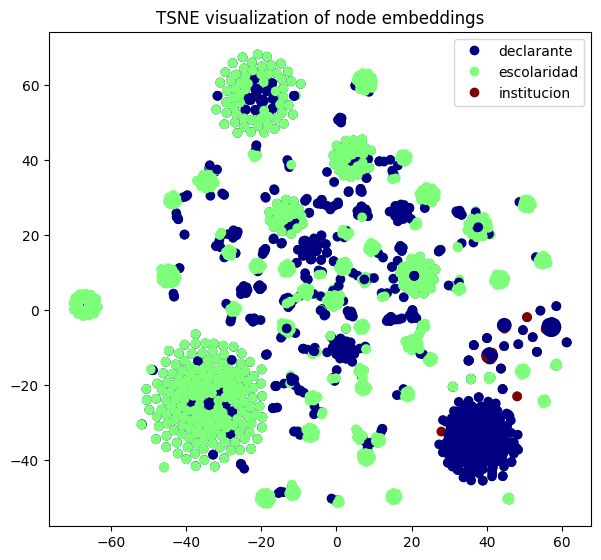

In [46]:
from sklearn.manifold import TSNE

node_embeddings = (
    model.wv.vectors
)

transform = TSNE  # PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(node_embeddings)

alpha = 1

plt.figure(figsize=(7, 7))
plt.axes().set(aspect="equal")
scatter  = plt.scatter(
    node_embeddings_2d[:, 0],
    node_embeddings_2d[:, 1],
    c=node_colours,
    cmap="jet",
    alpha=alpha,
    label = False,
)

plt.legend(handles=scatter.legend_elements()[0], labels=list(label_map.keys()))
plt.title("{} visualization of node embeddings".format(transform.__name__))
plt.show()

In [47]:
np.unique(np.array(node_colours))

array([0, 1, 2])

## Usando graph SAGE

In [ ]:
from torch_geometric.nn import SAGEConv
import torch

# Cargar el dataset
dataset = KarateClub()
data = dataset[0]

# Definir el modelo
class GraphSAGE(torch.nn.Module):
    def __init__(self):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(dataset.num_node_features, 32)
        self.conv2 = SAGEConv(32, 64)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x

model = GraphSAGE()
embeddings = model(data)

### Empleando Machine learning 

En esta sección se hará diferentes pruebas de algoritmos de machine learning para poder realizar las siguientes tareas:

1. Clasificación binaria: esto con el objetivo de poder clasificar si un funcionario puede ser o no sancionado. El detalle de este modelo será poder discriminar entre funcionarios que pueden ser sancionados o no. Cierto es que se trata de una clasificación, pero podemos usarlo para cuestiones de, dada la información de un funcionario, saber si puede ser o no sancionado. El modelo solo va a contemplar dos posibles opciones:

    a. si el funcionario no está cometiendo faltas, entonces no está sancionado
    b. si el funcionario está cometiendo faltas, y puede ser sancionado.

Esto en el escenario de tener un funcionar que ignoremos si debe ser sancionado.

### Método de aprendizaje supervisado

Para esta sección se usó regresión logística para poder hacer una clasificación binaria. Siendo la etiqueta a clasificar si el funcionario es sancionado o no.

In [79]:
match_df = match_df.drop_duplicates(subset=['nombres', 'primerApellido', 'segundoApellido'])

match_df = match_df.reset_index(drop=True)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# Conjunto de entrenamiento 
declarante_nodes = [
    node for node, data in G.nodes(data=True) if data.get("type") == "declarante"
]

X = np.array([model.wv[node] for node in declarante_nodes])
X = np.array(X)

y = match_df['sancionado'].values


print(len(X))
print(len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104,  test_size=0.3,  shuffle=True)

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


1503
1503


In [83]:
# Metricas de evaluacion
accuracy = lr.score(X_test, y_test)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)

# Mostrar métricas
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9978
Precision: 1.0000
Recall: 0.9286
F1 Score: 0.9630
Confusion Matrix:
[[437   0]
 [  1  13]]


### Método de aprendizaje no supervisado
Se aplicará clustering para encontrar agrupamientos de los nodos dadas sus características de relaciones entre sus nodos vecinos. O sea características de sus aristas.

* DBSCAN Clustering: es usado para encontrar anomalías.
* Clustering Jerarquico: para encontrar las ordenes de jeraquías entre los diferentes nodos. Con la finalidad de encontrar patrones que si existen anomalías, entonces los que están debajo de ese nodo, por jerarquía, potencialmente se pueden ver afectados. 

In [85]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


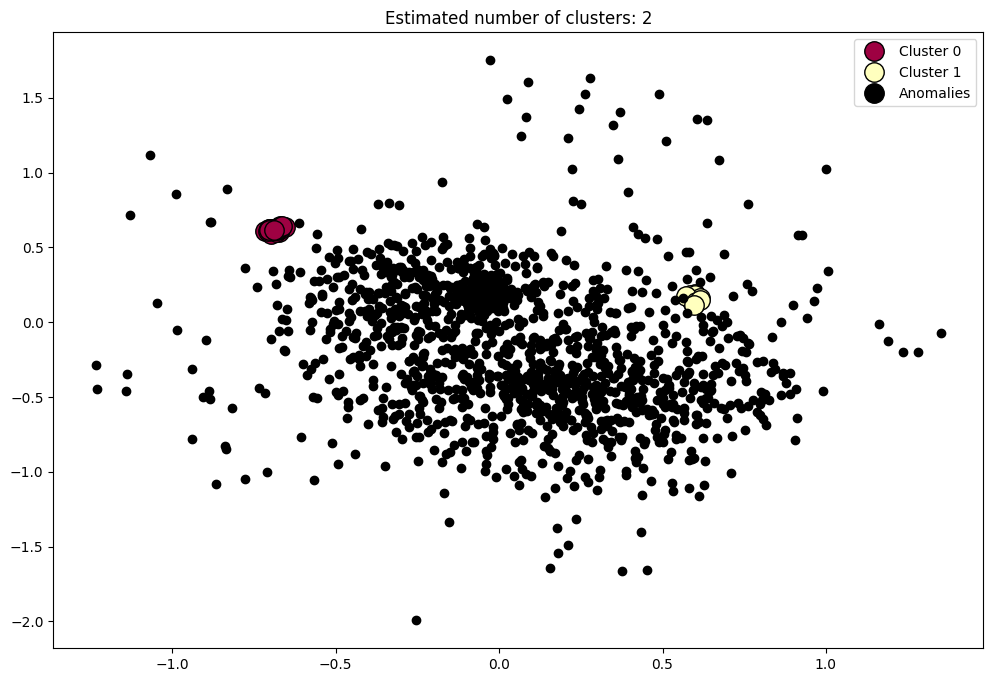

In [89]:
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura (ancho, alto)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        label = "Anomalies"
    else:
        label = f"Cluster {k}"

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
        label=label if k != -1 else None,  # Agrega etiqueta solo para clusters.
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

# Agregar puntos de anomalías como parte de la leyenda
plt.plot([], [], "o", markerfacecolor=(0, 0, 0, 1), markeredgecolor="k", markersize=14, label="Anomalies")

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.legend(loc="best")  # Agrega la leyenda
plt.show()


## Clustering jerarquico

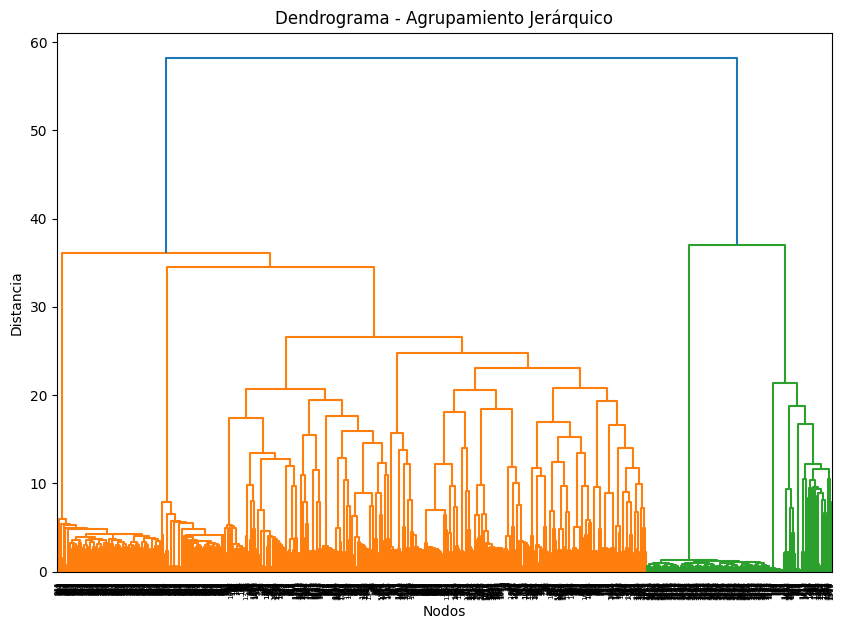

In [90]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calcular la matriz de enlace
Z = linkage(X, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrograma - Agrupamiento Jerárquico")
plt.xlabel("Nodos")
plt.ylabel("Distancia")
plt.show()